# Coursera Capstone File

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Business Problem

The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations.

In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides the aforementioned reasons, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads.

The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

# Data

The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present.

The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 4.
Severity codes are as follows:

0: Little to no Probability (Clear Conditions)

1: Very Low Probability — Chance or Property Damage

2: Low Probability — Chance of Injury

3: Mild Probability — Chance of Serious Injury

4: High Probability — Chance of Fatality

Furthermore, because of the existence of null values in some records, the data needs to be preprocessed before any further processing.



In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Data Understanding

In [5]:
df=pd.read_csv('AccidentSeverity.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
#count of the column SEVERITYCODE
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [8]:
df.shape

(194673, 38)

object     22
int64      12
float64     4
dtype: int64

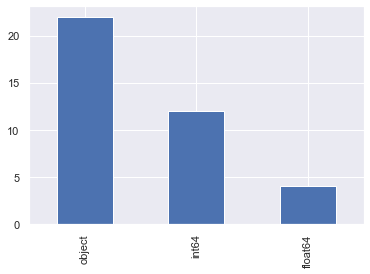

In [9]:
df.dtypes.value_counts().plot(kind='bar')
df.dtypes.value_counts()

From the above plot, we get an idea of how the data types are distributed in the dataset. There are 22 columns of the object datatype , 12 columns of the int datatype and 4 columns of float datatype. 

In [10]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = df[['Y', 'X']][df['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In the above picture, a map including clusters with incidents is displayed.

In [11]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [12]:
#dropping unneeded columns
df1= df.drop(['X','Y','INTKEY','COLDETKEY','REPORTNO','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC',
              'SEVERITYCODE.1','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC',
              'INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLDESC',
              'SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','ST_COLCODE'],axis=1)

<AxesSubplot:>

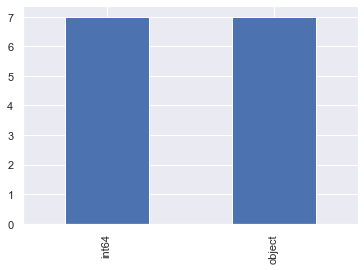

In [13]:
df1.dtypes.value_counts().plot(kind='bar')

Visualizing the values in the categorical columns

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

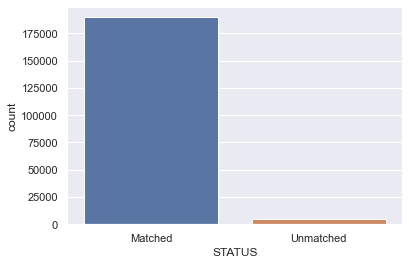

In [14]:
sns.countplot(df1['STATUS'], data=df1)
df1['STATUS'].value_counts()

From the graph above,we can say that the STATUS column has two variables Matched and Unmatched with around 180000 and 5000 values each. 

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

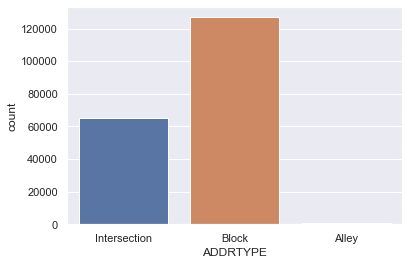

In [15]:
sns.countplot(df1['ADDRTYPE'], data=df1)
df1['ADDRTYPE'].value_counts()

From the graph above,we can say that the ADDRTYPE column has three variables Intersection, Block and Alley with around 60000, 120000 and 700 values each.

# Data Preprocessing

### Missing value imputation

In [16]:
df=df1
print('Shape: ',df.shape)

Shape:  (194673, 14)


In [17]:
#checking for missing values
df.isnull().sum()

SEVERITYCODE        0
OBJECTID            0
INCKEY              0
STATUS              0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64

THE ADDRTYPE, COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND columns have missing values. We are going to fill the missing values in the above mentioned columns with 'others'.

In [18]:
df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')

df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna(0)
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(0,'others')

df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

In [19]:
df.isnull().sum()

SEVERITYCODE     0
OBJECTID         0
INCKEY           0
STATUS           0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64

Now, the dataset is clean without any missing values.

# Exploratory Data Analysis

Let's do some basic exploratory analysis on the dataset 

In [20]:
import pandas_profiling

report=pandas_profiling.ProfileReport(df)
report

<AxesSubplot:xlabel='count', ylabel='COLLISIONTYPE'>

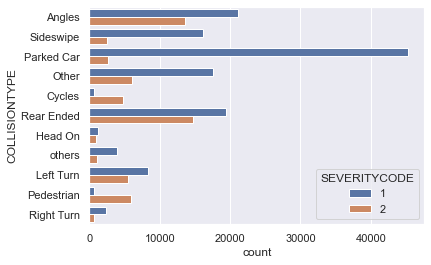

In [21]:
#The COLLISIONTYPE column describes the type of collison and has the following counts for each type.
sns.countplot(y='COLLISIONTYPE',hue='SEVERITYCODE',data=df)

<AxesSubplot:xlabel='count', ylabel='JUNCTIONTYPE'>

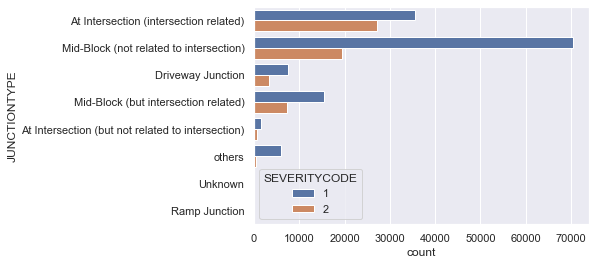

In [22]:
#The JUNCTIONTYPE column describes the Category of junction at which collision took place and 
#has the following counts for each category.
sns.countplot(y='JUNCTIONTYPE',hue='SEVERITYCODE',data=df)

<AxesSubplot:xlabel='count', ylabel='WEATHER'>

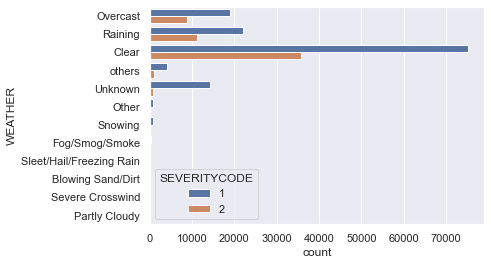

In [23]:
#The WEATHER column describes the weather conditions during the time of the collision and 
#has the following counts for each condition.
sns.countplot(y='WEATHER',hue='SEVERITYCODE',data=df)

<AxesSubplot:xlabel='count', ylabel='ROADCOND'>

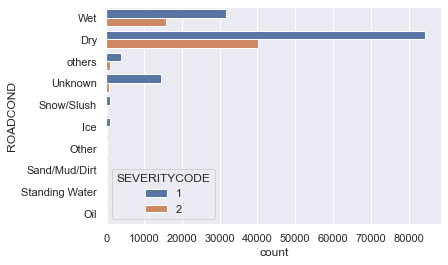

In [24]:
#The ROADCOND column describes the condition of the road during the collision and 
#has the following counts for each condition.
sns.countplot(y='ROADCOND',hue='SEVERITYCODE',data=df)

<AxesSubplot:xlabel='count', ylabel='LIGHTCOND'>

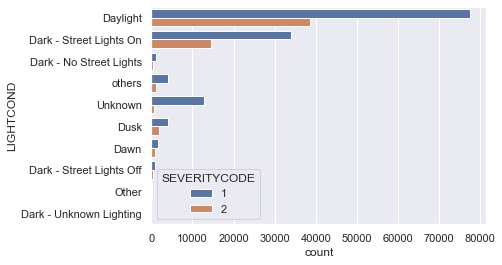

In [25]:
#The LIGHTCOND column describes the light conditions during the collision and
# has the following counts for each condition.
sns.countplot(y='LIGHTCOND',hue='SEVERITYCODE',data=df)

<AxesSubplot:xlabel='count', ylabel='ADDRTYPE'>

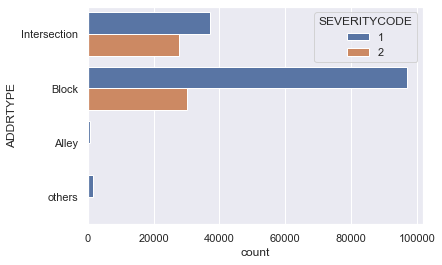

In [26]:
#The ADDRTYPE column describes the type of address and has the following counts for each category. 
sns.countplot(y='ADDRTYPE',hue='SEVERITYCODE',data=df)

# Predictive Modelling

### Label encoding for categorical variables

Let's take a look at the cleaned dataset.Find the datatypes of columns. Then, apply label encoding to change the categorical variables to numeric.

In [27]:
#the datatype of the cleaned dataset
df.dtypes

SEVERITYCODE      int64
OBJECTID          int64
INCKEY            int64
STATUS           object
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [28]:
#label encoding for ADDRTYPE,STATUS,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND columns.
from sklearn.preprocessing import LabelEncoder
addrtype_label=LabelEncoder()
addrtype_label.fit(df['ADDRTYPE'])
df['ADDRTYPE']=addrtype_label.transform(df['ADDRTYPE'])

status_label=LabelEncoder()
df['STATUS']=status_label.fit_transform(df['STATUS'])

collisiontype_label=LabelEncoder()
df['COLLISIONTYPE']=collisiontype_label.fit_transform(df['COLLISIONTYPE'])

junctiontype_label=LabelEncoder()
df['JUNCTIONTYPE']=junctiontype_label.fit_transform(df['JUNCTIONTYPE'])

weather_label=LabelEncoder()
df['WEATHER']=weather_label.fit_transform(df['WEATHER'])

road_label=LabelEncoder()
df['ROADCOND']=road_label.fit_transform(df['ROADCOND'])

light_label=LabelEncoder()
df['LIGHTCOND']=light_label.fit_transform(df['LIGHTCOND'])


In [29]:
df.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1,1307,0,2,0,2,0,0,2,1,4,8,5
1,1,2,52200,0,1,9,2,0,0,2,4,6,8,2
2,1,3,26700,0,1,5,4,0,0,3,4,4,0,5
3,1,4,1144,0,1,4,3,0,0,3,4,1,0,5
4,2,5,17700,0,2,0,2,0,0,2,1,6,8,5


In [30]:
df.dtypes

SEVERITYCODE     int64
OBJECTID         int64
INCKEY           int64
STATUS           int64
ADDRTYPE         int64
COLLISIONTYPE    int64
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
JUNCTIONTYPE     int64
WEATHER          int64
ROADCOND         int64
LIGHTCOND        int64
dtype: object

In [31]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

The target variable is imbalanced. So we downsample class 1.

In [32]:
from sklearn.utils import resample

df_1=df[df.SEVERITYCODE==1]
df_2=df[df.SEVERITYCODE==2]

df_sample=resample(df_1,replace=False,n_samples=58188,random_state=123)

balanced_df=pd.concat([df_sample,df_2])

balanced_df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

The dataset is now ready for modelling. We are going to use four machine learning models

.K Nearest Neighbours(KNN)

.Decision Tree

.Logistic Regression 

.Random Forest Classifier

And we will calculate the accuracy based on

1.Accuracy Score

2.F1 Score

3.Jaccard similarity Score

In [33]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, r2_score, confusion_matrix, classification_report

Now we assign the feature variables to X and the target variable to y and split the dataset into training and testing datasets. We are going to use 80% of the dataset for training and 20% of the dataset for testing.

In [34]:
X=balanced_df[['OBJECTID', 'INCKEY', 'STATUS', 'ADDRTYPE',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
y=balanced_df['SEVERITYCODE']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(93100, 13) (23276, 13) (93100,) (23276,)


### K Nearest Neighbours

In [36]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.50975253, 0.51245919, 0.51159993, 0.51516584, 0.51465028,
       0.5145214 , 0.51224437, 0.51340437, 0.51327548, 0.51361918,
       0.51550954, 0.51752879, 0.51129919, 0.51443547])

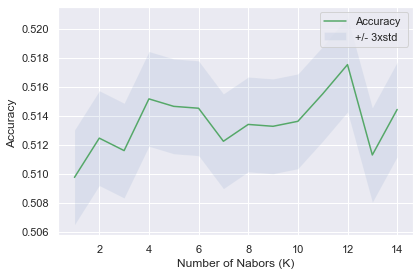

In [37]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [38]:
k=12

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)
#predict
knn_pred=neigh.predict(X_test)
print(knn_pred)

#calculate accuracy
print('')
print('Accuracy Score:',accuracy_score(knn_pred, y_test))
print('')
print('F1-Score:',f1_score(knn_pred, y_test))
print('')
print('Jaccard Score:',jaccard_score(knn_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, knn_pred))



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
[2 2 1 ... 1 2 2]

Accuracy Score: 0.5175287850146073

F1-Score: 0.5610194668126026

Jaccard Score: 0.38987286754319245

Confusion Martix:
[[7176 4578]
 [6652 4870]]

Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.61      0.56     11754
           2       0.52      0.42      0.46     11522

    accuracy                           0.52     23276
   macro avg       0.52      0.52      0.51     23276
weighted avg       0.52      0.52      0.51     23276



### Decision Tree

In [39]:
tree = DecisionTreeClassifier(criterion="gini", max_depth = 4).fit(X_train, y_train)
print(tree)

tree_pred = tree.predict(X_test)
print(tree_pred)
print('')
print('Accuracy Score:',accuracy_score(tree_pred, y_test))
print('')
print('F1-Score:',f1_score(tree_pred, y_test))
print('')
print('Jaccard Score:',jaccard_score(tree_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, tree_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, tree_pred))



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[1 1 2 ... 2 2 1]

Accuracy Score: 0.7002062210001718

F1-Score: 0.6762850250510299

Jaccard Score: 0.5108992780542511

Confusion Martix:
[[7289 4465]
 [2513 9009]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.62      0.68     11754
           2       0.67      0.78      0.72     11522

    accuracy                           0.70     23276
   macro avg       0.71      0.70      0.70     23276
weighted avg       0.71      0.70      0.70     23276



### Logistic Regression

In [40]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(lr)

lr_pred = lr.predict(X_test)
print(lr_pred)

print('')
print('Accuracy Score:',accuracy_score(lr_pred, y_test))
print('')
print('F1-Score:',f1_score(lr_pred, y_test))
print('')
print('Jaccard Score:',jaccard_score(lr_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, lr_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, lr_pred))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[1 1 2 ... 2 1 1]

Accuracy Score: 0.6342584636535488

F1-Score: 0.643852236120989

Jaccard Score: 0.4747655478775913

Confusion Martix:
[[7695 4059]
 [4454 7068]]

Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.65      0.64     11754
           2       0.64      0.61      0.62     11522

    accuracy                           0.63     23276
   macro avg       0.63      0.63      0.63     23276
weighted avg       0.63      0.63      0.63     23276



### Random Forest Classifier

In [41]:
rf = RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
print(rf)
rf_pred = rf.predict(X_test)
print(rf_pred)
print('')

print('Accuracy Score:',accuracy_score(rf_pred, y_test))
print('')
print('F1-Score:',f1_score(rf_pred, y_test))
print('')
print('Jaccard Score:',jaccard_score(rf_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, rf_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[1 1 2 ... 1 1 2]

Accuracy Score: 0.6694019590995016

F1-Score: 0.6745336886181956

Jaccard Score: 0.5089029293509477

Confusion Martix:
[[7176 4578]
 [6652 4870]]

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.68      0.67     11754
           2       0.67      0.66      0.66     11522

    accuracy                           0.67     23276
   macro avg       0.67      0.67      0.67    

# Evaluation


| Algorithm          |Accuracy | F1-score | Jaccard |
|--------------------|---------|----------|---------|
| KNN                | 0.51    | 0.56     | 0.38    |
| Decision Tree      | 0.70    | 0.67     | 0.51    |
| Logistic Regression| 0.63    | 0.64     | 0.47    |
| Random Forest      | 0.66    | 0.67     | 0.50    |

From the above table, Decision Tree is the best predictive model.

# Conclusion

Based on the dataset provided we can conclude that weather, road, and light conditions affect the severity of the accident,but we need to consider other attributes as well to get a model with better evaluation scores.

